## Exercise 04 : Histogram

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
df = pd.read_sql("""
                 SELECT strftime('%H', timestamp) AS hour,
                    CASE
                        WHEN strftime('%w', timestamp) IN ('1', '2', '3', '4', '5') THEN 'working_day'
                        ELSE 'weekend'
                    END AS day_type
                 FROM checker
                 WHERE uid LIKE 'user_%'
                 """,
con)

In [4]:
df['hour'] = df['hour'].astype(int)
df

,hour,day_type
0,5,working_day
1,5,working_day
2,5,working_day
3,5,working_day
4,5,working_day
...,...,...
3202,20,working_day
3203,20,working_day
3204,20,working_day
3205,20,working_day


In [5]:
workdays = df[df['day_type'] == 'working_day']['hour']
weekends = df[df['day_type'] == 'weekend']['hour']

<function matplotlib.pyplot.show(close=None, block=None)>

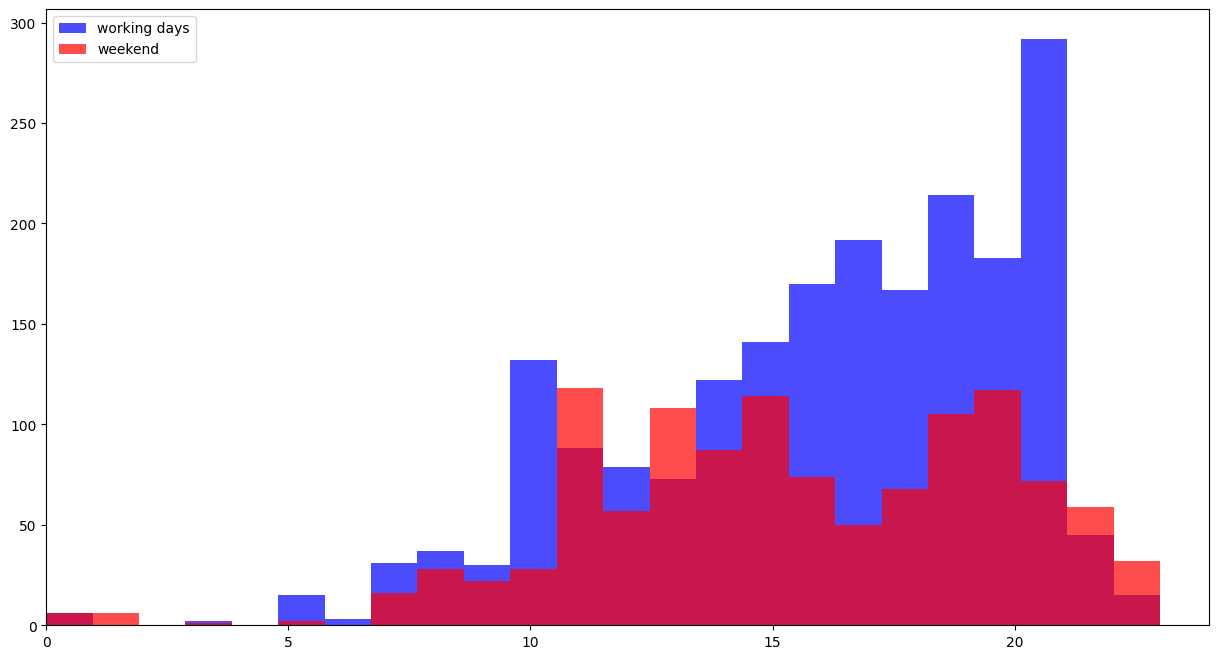

In [6]:
plt.figure(figsize = (15,8))
plt.hist(
    workdays, bins=24, label='working days', alpha=.7, color='blue'
)

plt.hist(
    weekends, bins=24, label='weekend', alpha=.7, color='red'
)
plt.legend()
plt.xlim([0, 24])
plt.show

In [7]:
con.close()

### Бывают ли часы, когда общее количество коммитов в выходные дни было выше, чем в рабочие дни?

11, 13, 22, 23